In this project, I will be calculating flood return periods and exceedance probability using Python. I will also use streamflow data to explore the probabilities of different magnitude events.
I will use the hydrofunctions python package to access streamflow data via an API from the United States Geological Survey (USGS) National Water Information System (NWIS) website.

In [3]:
!pip3 install hydrofunctions

     -------------------------------------- 40.4/40.4 kB 276.5 kB/s eta 0:00:00
     ---------------------------------------- 20.2/20.2 MB 5.5 MB/s eta 0:00:00


In [46]:
# importing the libraries
import os
import urllib
import requests
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
import hydrofunctions as hf

# date time confersion registry
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(font_scale=1.5, style='whitegrid')

%matplotlib inline


In [8]:
hf.draw_map()

In [10]:
# downloading the data and defining parameters
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# request data
longmont_resp = hf.get_nwis(site, 'dv', start, end)


Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&startDT=1946-05-10&endDT=2018-08-29


In [11]:
# convert the response to a json in order to use the extract.get_nwis() function
longmont_resp = longmont_resp.json()

# get metadata about the data
hf.get_nwis(site,'dv').json()

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500


{'name': 'ns1:timeSeriesResponseType',
 'declaredType': 'org.cuahsi.waterml.TimeSeriesResponseType',
 'scope': 'javax.xml.bind.JAXBElement$GlobalScope',
 'value': {'queryInfo': {'queryURL': 'http://waterservices.usgs.gov/nwis/dv/format=json%2C1.1&sites=06730500',
   'criteria': {'locationParam': '[ALL:06730500]',
    'variableParam': 'ALL',
    'parameter': []},
   'note': [{'value': '[ALL:06730500]', 'title': 'filter:sites'},
    {'value': '[mode=LATEST, modifiedSince=null]',
     'title': 'filter:timeRange'},
    {'value': 'methodIds=[ALL]', 'title': 'filter:methodId'},
    {'value': '2023-01-03T12:26:56.508Z', 'title': 'requestDT'},
    {'value': 'e9902520-8b61-11ed-a9e6-005056beda50', 'title': 'requestId'},
    {'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.gov/nwis/help/?provisional for more information.',
     'title': 'disclaimer'},
    {'value': 'caas01', 'title': 'server'}]},
  'timeSeries': [{'sourceInfo': {'siteName': 'BOULDER CREEK AT MOUTH

In [34]:
# requesting the data to return a pandas dataframe
longmont_dis = hf.extract_nwis_df(longmont_resp)
longmont_dis = longmont_dis[0]

c:\Users\Juliance\Desktop\Earth_DS\.venv\lib\site-packages\hydrofunctions\hydrofunctions.py:629: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not DF.index.is_monotonic:


In [35]:
# changing the column names
longmont_dis.columns = ['discharge','flag']
longmont_dis.head()

,discharge,flag
datetimeUTC,,
1946-05-10 00:00:00+00:00,16.0,A
1946-05-11 00:00:00+00:00,19.0,A
1946-05-12 00:00:00+00:00,9.0,A
1946-05-13 00:00:00+00:00,3.0,A
1946-05-14 00:00:00+00:00,7.8,A


In [42]:
!pip3 install pyqt5

     ---------------------------------------- 6.8/6.8 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 78.3/78.3 kB 723.9 kB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 2.0 MB/s eta 0:00:00


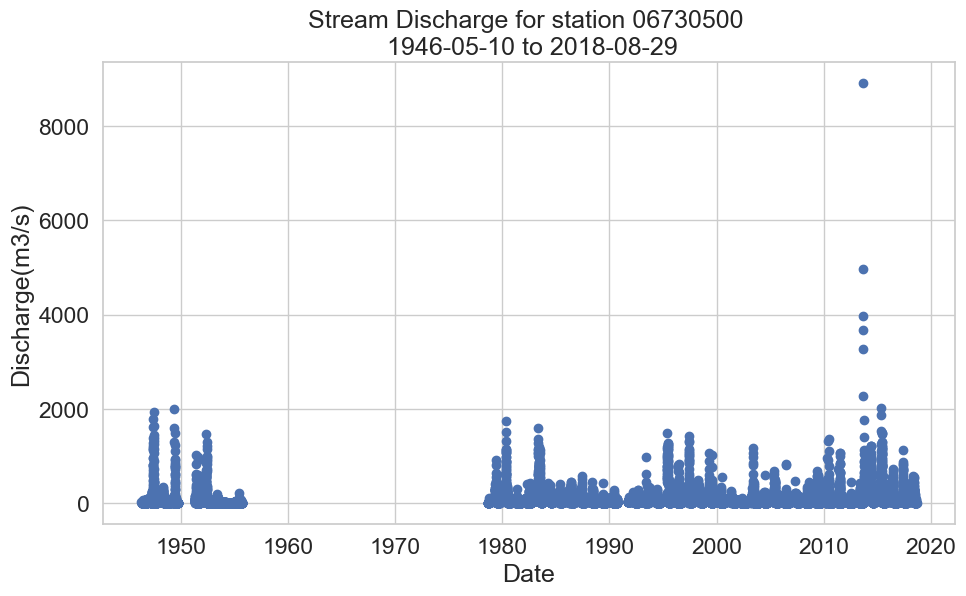

In [47]:
# plotting the data 
import PyQt5
f,ax = plt.subplots(figsize=(11,6))

ax.scatter(
    x=longmont_dis.index,
    y = longmont_dis['discharge']
)
ax.set(
    xlabel='Date',
    ylabel = 'Discharge(m3/s)',
    title= 'Stream Discharge for station {} \n {} to {}'.format(site,start,end)
)

plt.show()